<a href="https://colab.research.google.com/github/pdoren/analisis-estadistico-con-Python-G105/blob/main/Prueba_An%C3%A1lisis_estad%C3%ADstico_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba - Análisis estadístico con Python

**Nombre**: Pablo Saavedra <br />
**Curso**: Análisis estadístico con Python (G105)


---



## Carga de librerías y definición de funciones de apoyo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
import statsmodels.api as sm

pd.options.display.float_format = "{:,.2f}".format   # Visualizar 2 decimales

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 1. Carga de Datos
Carga los datos y explóralos. Elimina los datos nulos o incorrectos

---

Carga de los datos con Pandas:

In [2]:
df = pd.read_csv('/content/drive/MyDrive/cardio.csv')

# Se eliminan duplicados si existen
df = df.drop_duplicates()

# Eliminar valores nulos
df = df.dropna()

variables_categoricas = ['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
variables_cuantitativas = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.00,No,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,F,46,2.00,No,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,M,48,1.00,Yes,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,F,61,3.00,Yes,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,F,46,3.00,Yes,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0


Información del dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


Resumen estadístico

In [4]:
df.describe(include="all")

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656,"3,656.00","3,656.00",3656,"3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00"
unique,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2034,NaN,NaN,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.56,1.98,NaN,9.02,0.03,0.01,0.31,0.03,236.87,132.37,82.91,25.78,75.73,81.86,0.15
std,NaN,8.56,1.02,NaN,11.92,0.17,0.08,0.46,0.16,44.10,22.09,11.97,4.07,11.98,23.91,0.36
min,NaN,32.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,NaN,42.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00,0.00
50%,NaN,49.00,2.00,NaN,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00,0.00
75%,NaN,56.00,3.00,NaN,20.00,0.00,0.00,1.00,0.00,263.25,144.00,90.00,28.04,82.00,87.00,0.00


Resumen estadístico de las variables cuantitativas

In [5]:
df[variables_cuantitativas].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,"3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00","3,656.00"
mean,49.56,9.02,236.87,132.37,82.91,25.78,75.73,81.86
std,8.56,11.92,44.10,22.09,11.97,4.07,11.98,23.91
min,32.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00
50%,49.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
75%,56.00,20.00,263.25,144.00,90.00,28.04,82.00,87.00
max,70.00,70.00,600.00,295.00,142.50,56.80,143.00,394.00


### Variables Cuantitativas

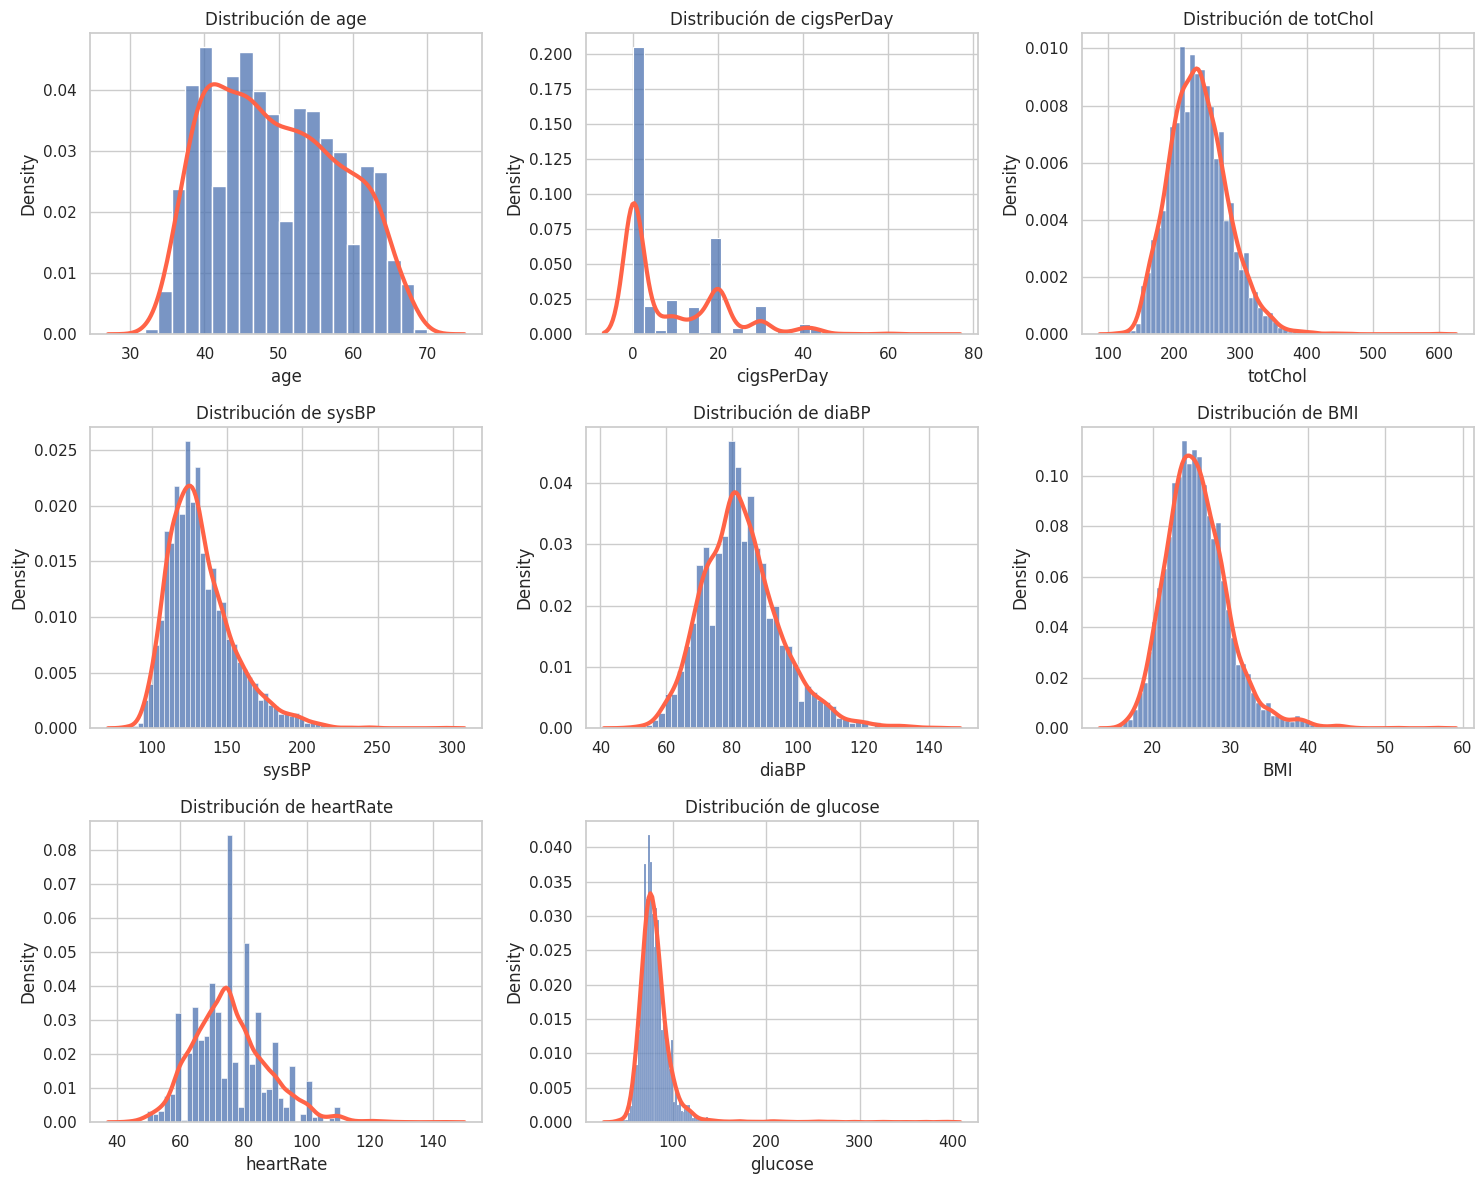

In [6]:
def plot_hist(_df: pd.DataFrame, _num_cols: list, _n_cols: int = 3):
  total = len(_num_cols)
  n_rows = int(np.ceil(total / _n_cols))

  fig, axes = plt.subplots(n_rows, _n_cols, figsize=(5*_n_cols, 4*n_rows))
  axes = axes.flatten()  # Para iterar fácil

  for i, col in enumerate(_num_cols):
      sns.histplot(data=_df[col], kde=False, stat='density', ax=axes[i])
      sns.kdeplot(data=_df[col], color='tomato', lw=3, ax=axes[i])
      axes[i].set_title(f"Distribución de {col}")

  # Eliminar ejes vacíos si sobran
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

plot_hist(df, variables_cuantitativas)

## Resumen Estadístico variables cuantitativas

### 1. Edad (age)
- **Media:** 49.6 años (desviación 8.6)  
- **Rango:** 32 a 70 años  
- **Distribución:** concentrada entre 42 (Q1) y 56 años (Q3), con mediana en 49.

### 2. Cigarrillos por día (cigsPerDay)
- **Media:** 9 cig/día (desviación 11.9)  
- **Rango:** 0 a 70 cig/día  
- **Observación:** la mediana es 0, lo que indica que más del 50% no fuma, pero existe un grupo reducido con consumo muy alto.

### 3. Colesterol total (totChol)
- **Media:** 236.9 mg/dL (desviación 44.1)  
- **Rango:** 113 a 600 mg/dL  
- **Distribución:** valores típicos entre 206 (Q1) y 263 mg/dL (Q3). Hay outliers muy altos (600).

> **Nota:**
> Según la American Heart Association (AHA) los niveles de colesterol total en adultos se clasifican así:
> - Deseable (normal): < 200 mg/dL
> - Límite alto: 200 – 239 mg/dL
> - Alto: ≥ 240 mg/dL

### 4. Presión arterial sistólica (sysBP)
- **Media:** 132.4 mmHg (desviación 22.1)  
- **Rango:** 83.5 a 295 mmHg  
- **Distribución:** la mitad de los valores están entre 117 y 144 mmHg (mediana 128). Hay hipertensión severa en algunos casos (>200).

>**Nota**: Niveles normales de presión arterial sistólica: < 120 mm Hg

### 5. Presión arterial diastólica (diaBP)
- **Media:** 82.9 mmHg (desviación 12.0)  
- **Rango:** 48 a 142.5 mmHg  
- **Distribución:** la mayoría está entre 75 y 90 mmHg (mediana 82). Valores máximos muestran hipertensión marcada.

>**Nota**: Niveles normales de presión diastólica normal: < 80 mm Hg

### 6. Índice de Masa Corporal (BMI)
- **Media:** 25.8 (desviación 4.1)  
- **Rango:** 15.5 a 56.8  
- **Distribución:** entre 23 (Q1) y 28 (Q3). Mediana 25.4, es decir, en promedio borde de sobrepeso. Existen casos de obesidad extrema (>40).

### 7. Frecuencia cardíaca (heartRate)
- **Media:** 75.7 lpm (desviación 12.0)  
- **Rango:** 44 a 143 lpm  
- **Distribución:** típica entre 68 y 82 lpm (mediana 75). Algunos valores de taquicardia (>100) asumiendo que fue tomado en reposo.

### 8. Glucosa
- **Media:** 81.9 mg/dL (desviación 23.9)  
- **Rango:** 40 a 394 mg/dL  
- **Distribución:** mediana 78 mg/dL, con valores normales en la mayoría. Sin embargo, hay casos extremos de hiperglicemia (>200).


---

## Conclusión general
- La muestra poblacional es adulta (32–70 años) y en su mayoría no fumadora.  
- El colesterol y la presión arterial presentan valores en rangos normales-altos, con casos severos.  
- El **IMC promedio indica sobrepeso leve**.  
- La glucosa y frecuencia cardíaca son normales en la mayoría, pero con algunos outliers.


### Variables Categóricas

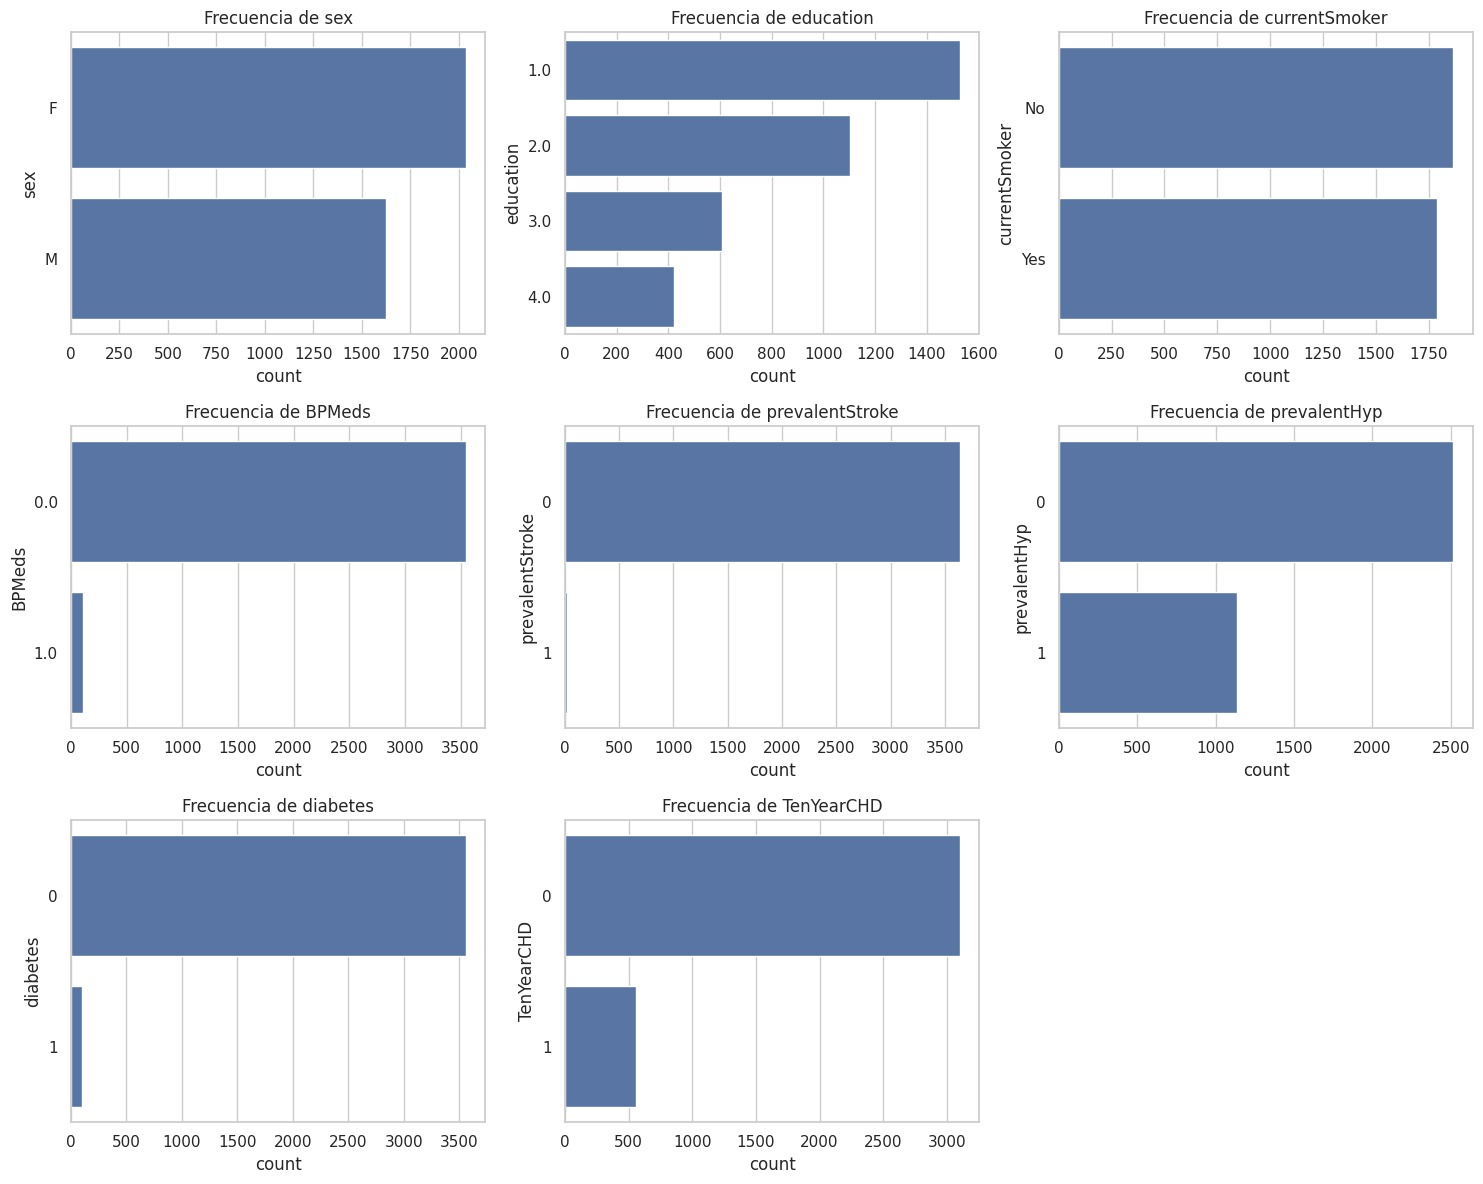

In [18]:
def plot_count(_df: pd.DataFrame, _num_cols: list, _n_cols: int = 3):
  total = len(_num_cols)
  n_rows = int(np.ceil(total / _n_cols))

  fig, axes = plt.subplots(n_rows, _n_cols, figsize=(5*_n_cols, 4*n_rows))
  axes = axes.flatten()  # Para iterar fácil

  for i, col in enumerate(_num_cols):
      sns.countplot(y=col, data=_df, order=_df[col].value_counts().index, ax=axes[i])
      axes[i].set_title(f"Frecuencia de {col}")

  # Eliminar ejes vacíos si sobran
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

plot_count(df, variables_categoricas)

In [19]:
df[variables_categoricas].replace({0: "No", 1: "Sí"}).describe(include=[object])

,sex,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,3656,3656,3656,3656,3656,3656,3656,3656
unique,2,4,2,2,2,2,2,2
top,F,Sí,No,No,No,No,No,No
freq,2034,1526,1868,3545,3635,2517,3557,3099


## Resumen estadístico variables categóricas

### 1. Sexo (sex)
- **Categorías:** 2  
- **Más frecuente:** F (femenino) con **2,034** casos (55,6%).  
- **Conclusión:** ligero predominio de mujeres en la muestra.


### 2. Nivel educativo (education)
- **Categorías:** 4  
- **Más frecuente:** nivel 1 con **1,526** casos (41,7%).  
- **Conclusión:** distribución que se concentra en los niveles bajos.


### 3. Tabaquismo actual (currentSmoker)
- **Categorías:** 2 (Sí/No)  
- **Más frecuente:** Sí con **1,868** casos (51,1%).  
- **Conclusión:** más de la mitad fuman actualmente.


### 4. Uso de medicamentos para presión arterial (BPMeds)
- **Categorías:** 2  
- **Más frecuente:** No con **3,545** casos (97%).  
- **Conclusión:** muy pocos toman medicamentos para la presión arterial.

### 5. Accidente cerebrovascular prevalente (prevalentStroke)
- **Categorías:** 2  
- **Más frecuente:** No con **3,635** casos (99,4%).  
- **Conclusión:** el accidente cerebrovascular es muy poco frecuente en la población.


### 6. Hipertensión prevalente (prevalentHyp)
- **Categorías:** 2  
- **Más frecuente:** No con **2,517** casos (68,9%).  
- **Conclusión:** alrededor del **31% sí presenta hipertensión**.


### 7. Diabetes
- **Categorías:** 2  
- **Más frecuente:** No con **3,557** casos (97,3%).  
- **Conclusión:** la diabetes es poco prevalente (~2,7%).


### 8. Enfermedad coronaria a 10 años (TenYearCHD)
- **Categorías:** 2  
- **Más frecuente:** No con **3,099** casos (84,8%).  
- **Conclusión:** **15,2% presentan riesgo de enfermedad coronaria**.

---

## Conclusión general
- La muestra es mayoritariamente **femenina**.  
- Más de la mitad **fuman actualmente**.
- El accidente cerebrovascular es muy poco frecuente.  
- Existe una proporción importante de **hipertensos (~31%)**.  
- El tabaquismo y la hipertensión son los **factores de riesgo principales** en esta muestra de población.


### Outliers

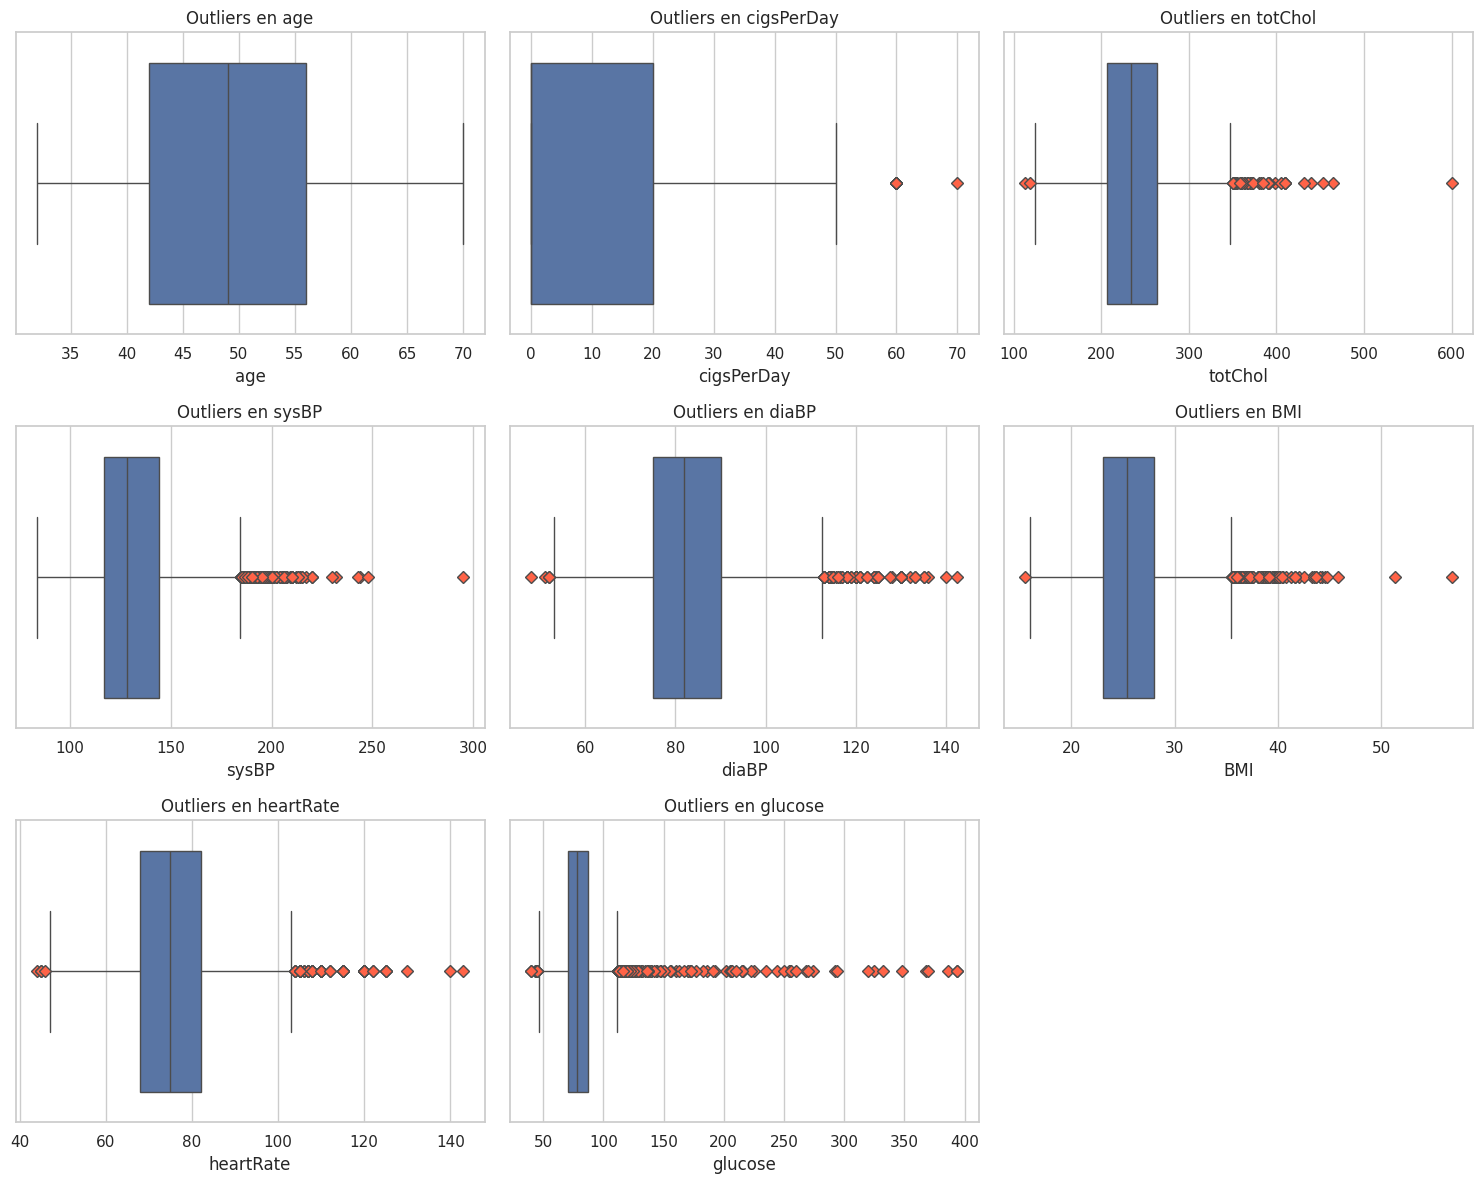

In [20]:
def plot_outliers(_df: pd.DataFrame, _num_cols: list, _n_cols: int = 3):
  total = len(_num_cols)
  n_rows = int(np.ceil(total / _n_cols))

  fig, axes = plt.subplots(n_rows, _n_cols, figsize=(5*_n_cols, 4*n_rows))
  axes = axes.flatten()  # Para iterar fácil

  for i, col in enumerate(_num_cols):
      sns.boxplot(x=_df[col], flierprops = {'markerfacecolor':'tomato', 'marker':'D'}, ax=axes[i])
      axes[i].set_title(f"Outliers en {col}")

  # Eliminar ejes vacíos si sobran
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

plot_outliers(df, variables_cuantitativas)


## Conclusión

- Casi todos los datos de las variables cuantitativas tienen outliers, con excepción de la edad
- Los casos dramáticos son los de la glucosa y el BMI


## 2. Análisis Descriptivo
Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

---

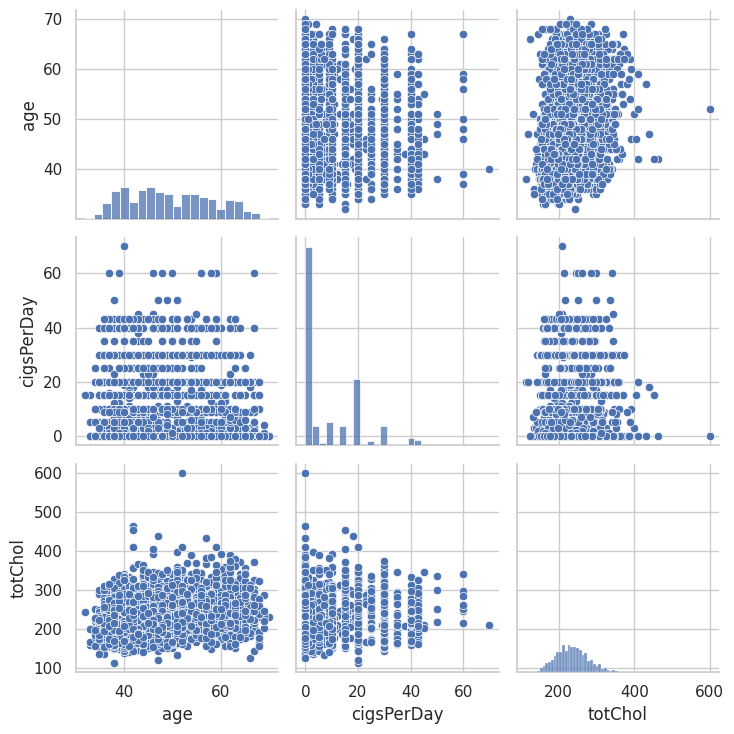

,age,cigsPerDay,totChol
count,"3,656.00","3,656.00","3,656.00"
mean,49.56,9.02,236.87
std,8.56,11.92,44.10
min,32.00,0.00,113.00
25%,42.00,0.00,206.00
50%,49.00,0.00,234.00
75%,56.00,20.00,263.25
max,70.00,70.00,600.00


In [21]:
variables = ['age', 'cigsPerDay', 'totChol']

sns.pairplot(df[variables])
plt.tight_layout()
plt.show()

df[variables].describe()

## Análisis descriptivo

### 1. Edad (age)
- **Media:** 49.6 años (desviación 8.6).  
- **Rango:** 32 a 70 años.  
- **Distribución:** la mayoría está entre 42 y 56 años (IQR).  
- **Conclusión:** población adulta media, sin valores extremos marcados.


### 2. Cigarrillos por día (cigsPerDay)
- **Media:** 9 cig/día (desviación 11.9).  
- **Rango:** 0 a 70 cig/día.  
- **Mediana:** 0 más del 50% no fuma.  
- **Distribución:** gran cantidad de no fumadores, pero con un grupo reducido de fumadores intensos (outliers hasta 70 cig/día).  
- **Conclusión:** variable muy sesgada hacia el 0, pero con casos de consumo muy alto.


## 3. Colesterol total (totChol)
- **Media:** 236.9 mg/dL (desviación 44.1).  
- **Rango:** 113 a 600 mg/dL.  
- **Distribución:** valores típicos entre 206 y 263 mg/dL (IQR).  
- **Observación:** existen outliers muy altos (≥ 600).  
- **Conclusión:** el promedio está en el rango **límite alto** (200–239 mg/dL según AHA).

---

## ¿Cuál presenta mayor dispersión?

Para comparar la dispersión entre variables se puede usar el coeficiente de variación (CV = std / media) porque estandariza respecto a la escala de cada variable.

| Variable       | Media  | Std   | CV (std/media) |
|----------------|--------|-------|----------------|
| **age**        | 49.56  | 8.56  | **0.17** |
| **cigsPerDay** | 9.02   | 11.92 | **1.32** |
| **totChol**    | 236.87 | 44.10 | **0.19** |

**CigsPerDay (cigarrillos/día)** es la que presenta la **mayor dispersión relativa** (CV = **1.32**).  
  - La desviación estándar es incluso mayor que el promedio.  
  - Refleja la fuerte diferencia entre **no fumadores** y **fumadores intensivos**.


## 3. Limpiar Dataset
Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"

---

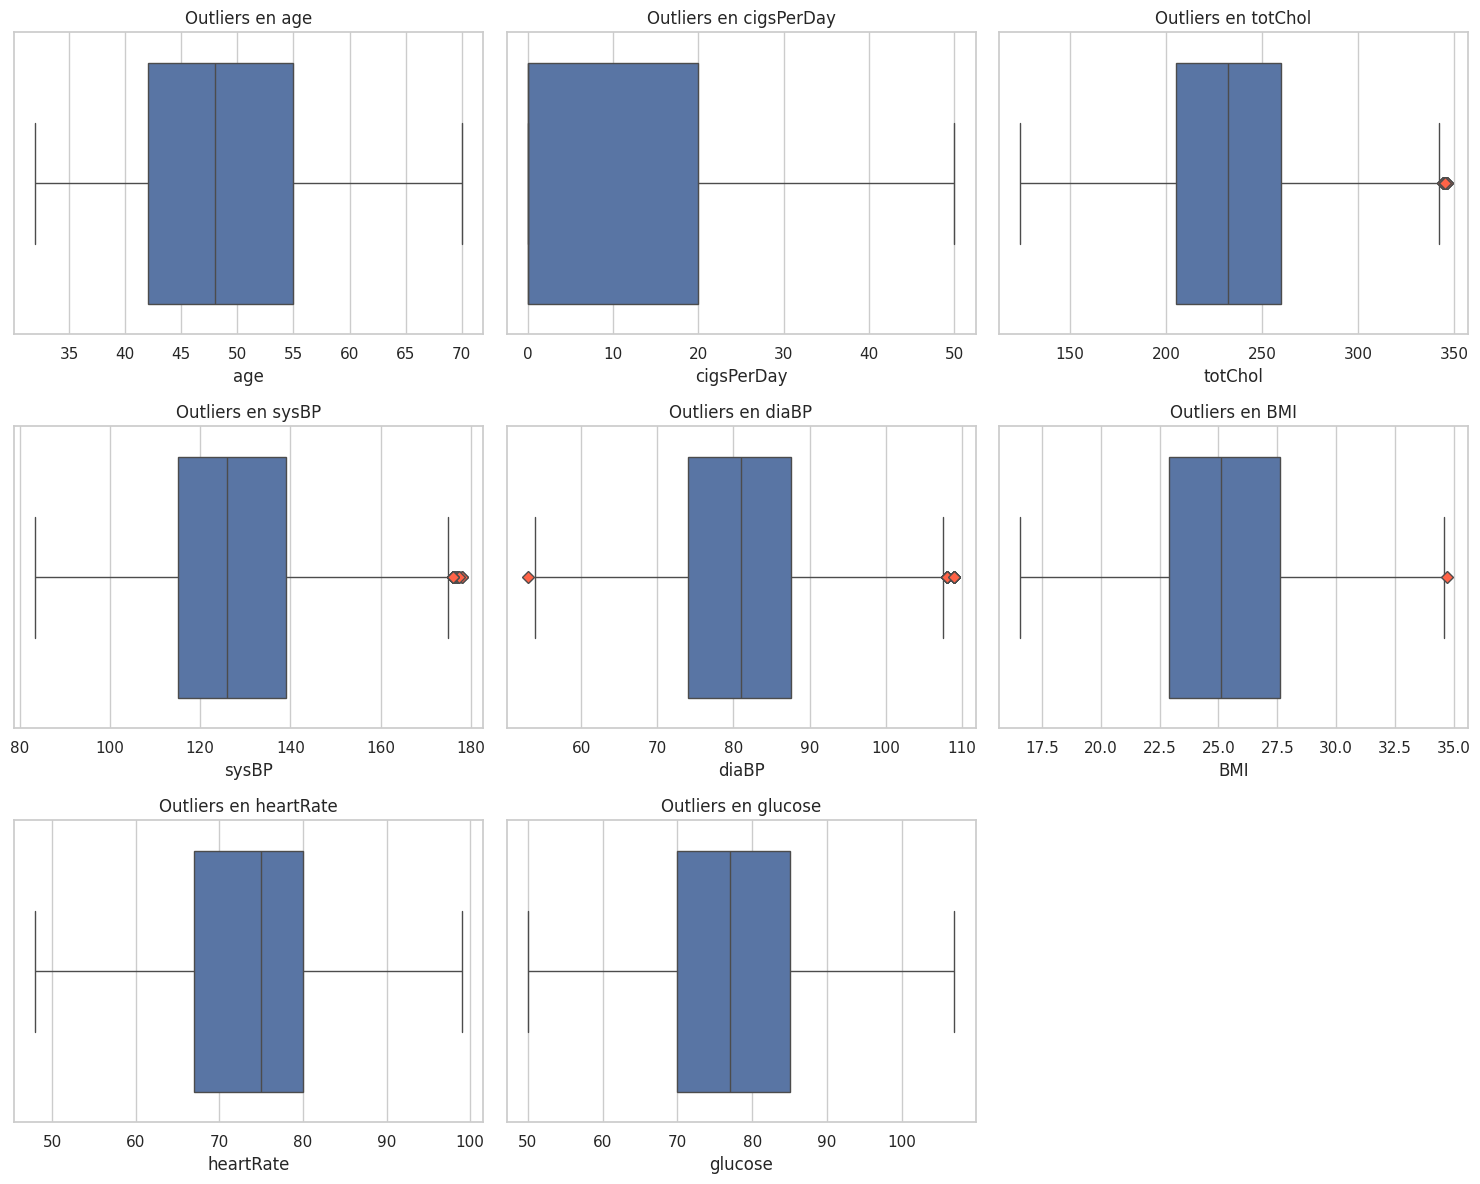

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,"3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00","3,036.00"
mean,48.98,2.02,9.13,0.02,0.00,0.25,0.01,233.76,128.17,81.12,25.29,73.96,78.04,0.13
std,8.45,1.03,11.70,0.13,0.07,0.43,0.07,40.32,17.18,10.13,3.38,10.07,10.71,0.34
min,32.00,1.00,0.00,0.00,0.00,0.00,0.00,124.00,83.50,53.00,16.59,48.00,50.00,0.00
25%,42.00,1.00,0.00,0.00,0.00,0.00,0.00,205.00,115.00,74.00,22.91,67.00,70.00,0.00
50%,48.00,2.00,0.00,0.00,0.00,0.00,0.00,232.00,126.00,81.00,25.11,75.00,77.00,0.00
75%,55.00,3.00,20.00,0.00,0.00,1.00,0.00,260.00,139.00,87.50,27.61,80.00,85.00,0.00
max,70.00,4.00,50.00,1.00,1.00,1.00,1.00,346.00,178.00,109.00,34.69,99.00,107.00,1.00


In [22]:
def clean_outliers(_df: pd.DataFrame, _cols: list, _k: float=1.5):
  df_ret = df.copy()
  for col in _cols:
    while True:
      q1, q3 = df_ret[col].quantile([.25, .75])
      iqr = q3 - q1
      low, high = q1 - _k * iqr, q3 + _k * iqr
      mask_out = (df_ret[col] < low) | (df_ret[col] > high)
      if mask_out.any():
        df_ret = df_ret[~mask_out]
      else:
        break
  return df_ret

df_limpio = clean_outliers(df, variables_cuantitativas)

plot_outliers(df_limpio, variables_cuantitativas)

df_limpio.describe()

## 4. Correlación
¿Qué variables cuantitativas presentan mayor correlación? Explica.

---

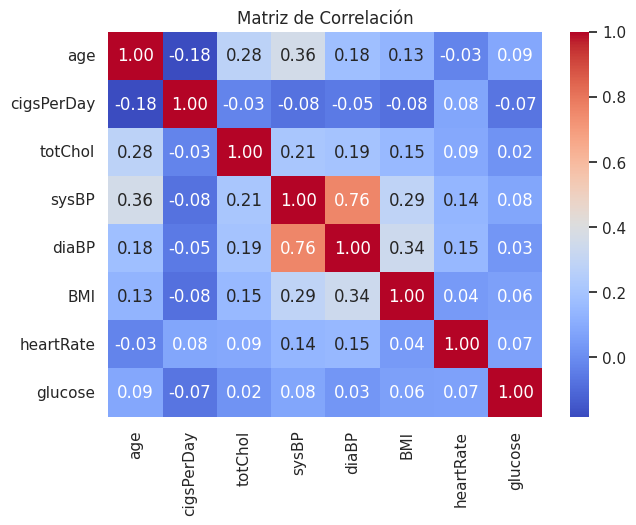

In [23]:
matriz_correlacion = df_limpio[variables_cuantitativas].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

La presión arterial sistólica (sysBP) y la presión arterial diastólica (diaBP) tienen una alta correlación, 0.75 respectivamente. Ambas son dos mediciones de presión relacionadas, pero que representan momentos distintos del ciclo cardíaco. Existe una diferencia númerica de ambas presiones que normalmente está entre 30 y 50 mmHg.

## 5. Probabilidad
Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?

---

In [24]:
q3 = df_limpio['BMI'].quantile(.75)

A = len(df_limpio[df_limpio['BMI'] >= q3]) # cantidad total de personas con un índice de masa corporal del último quartil
B = len(df_limpio[(df_limpio['sex'] == 'M') & (df_limpio['BMI'] >= q3)]) # Total de hombres pertenecientes al conjunto anterior

P = B / A

print(f'La probabilidad de escoger un paciente hombre al azar del conjunto de personas con un índice de masa corporal del último quartil es: {P:.2f}')

La probabilidad de escoger un paciente hombre al azar del conjunto de personas con un índice de masa corporal del último quartil es: 0.54


## 6. Media Muestral
¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

---

Para poder validar si es razonable pensar en que el promedio del ritmo cardiaco en 75 se puede realizar un test de hipótesis de doble cola:

$$ H_0: \mu = 75 $$
$$ H_1: \mu \not= 75 $$

Considerando una significancia de 1% y que los datos del dataframe son una muestra representativa de la población, se tiene que:

In [25]:
mu = 75
significancia = 0.01
values = df_limpio['heartRate']
t_stat, p_value = st.ttest_1samp(values, mu)

# Imprimir el valor t, el valor p y la media muestral
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")
print(f'Media muestral: {values.mean():.2f}')

if p_value < significancia:
  print(f"Con nivel de confianza del {(1-significancia)*100}%, se rechaza la hipótesis nula, es decir, el promedio no es igual a 75")
else:
  print(f"Con nivel de confianza del {(1-significancia)*100}%, no se puede rechazar la hipótesis nula") # no necesariamente

Valor t: -5.680327349141455
Valor p: 1.471531517653367e-08
Media muestral: 73.96
Con nivel de confianza del 99.0%, se rechaza la hipótesis nula, es decir, el promedio no es igual a 75


La media poblacional aproximada es:

In [ ]:
def get_media(_data, _significancia):
  m, s, n = _data.mean(), _data.std(ddof=1), len(_data)
  t = st.t.ppf(1 - _significancia, df=n-1)  # t-value
  e = t * (s / np.sqrt(n))  # Margin
  a = m - e # Límite Inferior Intervalo
  b = m + e # Límite Superior Intervalo
  ret_mu = a
  d = (b - a) * 0.01 # paso para las pruebas
  while ret_mu <= b:
    t_stat, p_value = st.ttest_1samp(_data, ret_mu, alternative='greater') # Prueba de hipótesis
    if (p_value < _significancia):
      ret_mu += d # Se suma el paso para la próxima prueba
    else:
      break
  return ret_mu

mu_1 = get_media(df_limpio['heartRate'], significancia)
print(mu_1)

73.54534450499332


## 7. Fumar y ser hombre
Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.

---

Para revisar la influencia sobre el promedio de cigarrillos consumidos por día se realizará una prueba de hipótesis para muestras independientes. Ya que vamos a comparar las medias de dos grupos distintos se utilizará t-test de dos muestras independientes.

<br />

**Hipótesis nula (H₀):** No hay diferencias entre las medias entre hombres y muejers, es decir, no hay influencia significativa en el promedio de cigarrillos consumidos si el paciente es hombre.

**Hipótesis alternativa (H₁):** Hay diferencias en el promedio entre hombres y mujeres, es decir, hay influencia significativa en el promedio de cigarrillos consumidos si el paciente es hombre.

<br />

Considerando una significancia de 5%, se tiene que:

In [26]:
# Pacientes fumadores
hombre = df_limpio[(df_limpio['sex'] == 'M') & (df_limpio['currentSmoker'] == 'Yes')]['cigsPerDay']
mujer = df_limpio[(df_limpio['sex'] == 'F') & (df_limpio['currentSmoker'] == 'Yes')]['cigsPerDay']

# Nivel de significancia (alfa)
alpha = 0.05

# Realizar una prueba de hipótesis (prueba t de muestras independientes)
t_stat, p_value = st.ttest_ind(hombre, mujer, equal_var=False)

# Comprobar si el valor p es menor que alfa para rechazar la hipótesis nula
if p_value < alpha:
    print("Resultado: Se rechaza la hipótesis nula")
else:
    print("Resultado: No se puede rechazar la hipótesis nula")

# Imprimir el valor t y el valor p
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

Resultado: Se rechaza la hipótesis nula
Valor t: 16.092083974003682
Valor p: 7.038842615192592e-54


Se rechaza la hipótesis nula y por lo tanto **existe una influencia significativa en el promedio de cigarrillos consumidos si el paciente es hombre**.

## 8. Regresión lineal
Construye un modelo de regresión lineal que permita relacionar 6 variables del
dataset con el índice de masa corporal. (Debes incluir al menos dos variables
cualitativas). Evalúa tu modelo y explica.

---

Antes de seleccionar las 6 variables se procede a revisar la matriz de correlación incluidos las variables categóricas, Además se utiliza la correlación de Spearman debido a que no asume distribución normal y funciona con variables ordinales (education).

/tmp/ipython-input-3256751549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matriz_correlacion = df_limpio.replace({"M": -1, "F": 1, "No": -1, "Yes": 1}).corr(method="spearman")


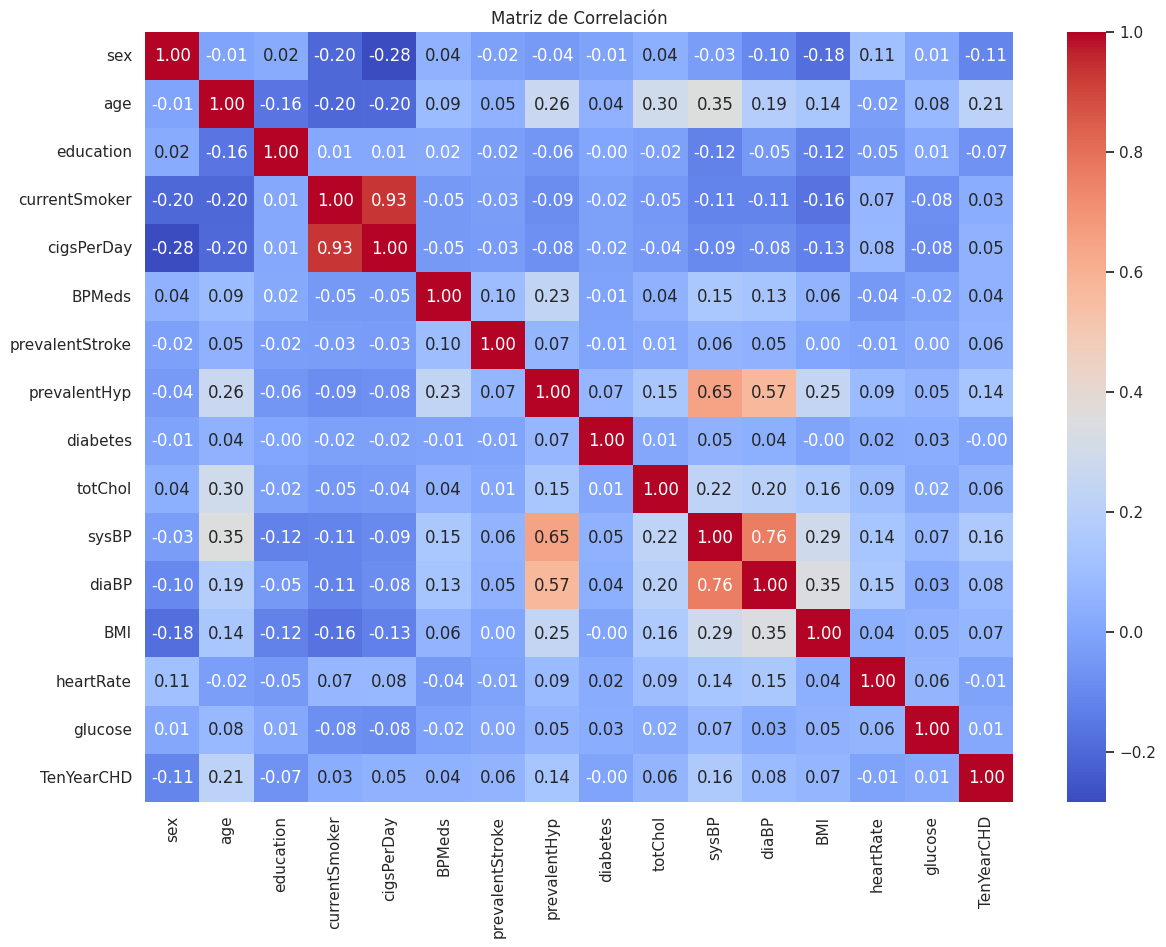

In [43]:
matriz_correlacion = df_limpio.replace({"M": 0, "F": 1, "No": 0, "Yes": 1}).corr(method="spearman")

plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Para el modelo se utilizará:

- sysBP
- diaBP
- totChol
- prevalentHyp
- sex (categorica)
- currentSmoker (categorica)

In [88]:
df_modelo = df_limpio.replace({"M": -1, "F": 1, "No": -1, "Yes": 1}).copy()

def get_desempeno_modelo_bmi(_df_modelo, _variables):
  X = _df_modelo[_variables]  # Variable independiente
  Y = _df_modelo['BMI'] # Variable dependiente

  X_const = sm.add_constant(X)  # agrega intercepto
  modelo = sm.OLS(Y, X_const).fit()

  r2 = modelo.rsquared
  params = modelo.params          # [const, beta_X]
  rmse = np.sqrt(np.mean((modelo.fittedvalues - Y) ** 2))

  print('Ecuación:  ')
  eq = "Y = ";
  for i in range(len(_variables) + 1):
    if i == 0:
      eq += f"{params.iloc[i]:.3f}"
    else:
      eq += f"{params.iloc[i]:+.3f}·X{i}"
  print(eq)
  print(f"R² = {r2:.3f} | RMSE = {rmse:.3f}")
  print('==============================================================================')
  print(modelo.summary())
  print('==============================================================================')

print('==============================================================================')
print("Métricas de Desempeño Modelo lineal BMI:")
print('==============================================================================')
get_desempeno_modelo_bmi(df_modelo, ["sysBP", "diaBP", "totChol", "prevalentHyp", "sex", "currentSmoker"])


Métricas de Desempeño Modelo lineal BMI:
Ecuación:  
Y = 16.537+0.006·X1+0.075·X2+0.008·X3+0.492·X4-0.563·X5-0.532·X6
R² = 0.167 | RMSE = 3.084
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sat, 23 Aug 2025   Prob (F-statistic):          1.59e-116
Time:                        00:21:56   Log-Likelihood:                -7726.9
No. Observations:                3036   AIC:                         1.547e+04
Df Residuals:                    3029   BIC:                         1.551e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.

/tmp/ipython-input-3453461530.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_modelo = df_limpio.replace({"M": -1, "F": 1, "No": -1, "Yes": 1}).copy()


## Modelo lineal obtenido:

$$ BMI = 16.537 + 0.006·sysBP + 0.075·diaBP + 0.008·totChol + 0.492·prevalentHyp - 0.563·sex - 0.532·currentSmoker $$

## Conclusiones

- R² = **0.167** indica que el modelo explica solo el **16.7% de la variabilidad del BMI**.  
- RMSE = **3.084** indica un error promedio de predicción de ~3 puntos de BMI.
- **F-statistic** altamente significativo (p < 0.001).  
- Ajuste global significativo (F-statistic), pero poder explicativo bajo (R²)

## 9. Regresión Logística
Construye un modelo de regresión logística para predecir el riesgo de sufrir una
enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.

---

Primero se realizara un entrenamiento sin balanceo y luego otro con balanceo (SMOTE) de la variable TenYearCHD.

### función de desempeño

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
 roc_auc_score, average_precision_score, roc_curve, auc, confusion_matrix, \
 ConfusionMatrixDisplay, precision_recall_curve, RocCurveDisplay, classification_report

def get_desempeno(_y, _y_pred, _X, model):
  # Calcular métricas de desempeño
  accuracy = accuracy_score(_y, _y_pred)
  precision = precision_score(_y, _y_pred)
  recall = recall_score(_y, _y_pred)
  f1 = f1_score(_y, _y_pred)
  roc_auc = roc_auc_score(_y, _y_pred)
  average_precision = average_precision_score(_y, _y_pred)

  # Imprimir las métricas de desempeño
  print(f"Accuracy: {accuracy:.3f}")
  print(f"Precision: {precision:.3f}")
  print(f"Recall: {recall:.3f}")
  print(f"F1 Score: {f1:.3f}")
  print(f"AUC-ROC: {roc_auc:.3f}")
  print(f"AUC-PR (AP): {average_precision:.3f}")
  print('==============================================================================')
  print("\nClassification report:")
  print(classification_report(_y, _y_pred, digits=3))
  print('==============================================================================')

  #Probabilidades para métricas basadas en score
  y_score = model.predict_proba(_X)[:, 1]

  #Curva ROC y AUC
  fpr, tpr, thresholds = roc_curve(_y, y_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="LogisticRegression").plot()
  plt.title(f"Curva ROC (AUC = {roc_auc:.3f})")
  plt.show()

  #Matriz de confusión (umbral por defecto 0.5)
  _y_pred = (y_score >= 0.5).astype(int)
  cm = confusion_matrix(_y, _y_pred, labels=[0,1])

  plt.figure()
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
  disp.plot(values_format='d')
  plt.title("Matriz de confusión")
  plt.show()

## Resultados

Métricas de Desempeño datos NO resampleados:
Accuracy: 0.869
Precision: 0.333
Recall: 0.005
F1 Score: 0.010
AUC-ROC: 0.502
AUC-PR (AP): 0.132

Classification report:
              precision    recall  f1-score   support

           0      0.870     0.998     0.930      2639
           1      0.333     0.005     0.010       397

    accuracy                          0.869      3036
   macro avg      0.601     0.502     0.470      3036
weighted avg      0.800     0.869     0.809      3036



<Figure size 1000x600 with 0 Axes>

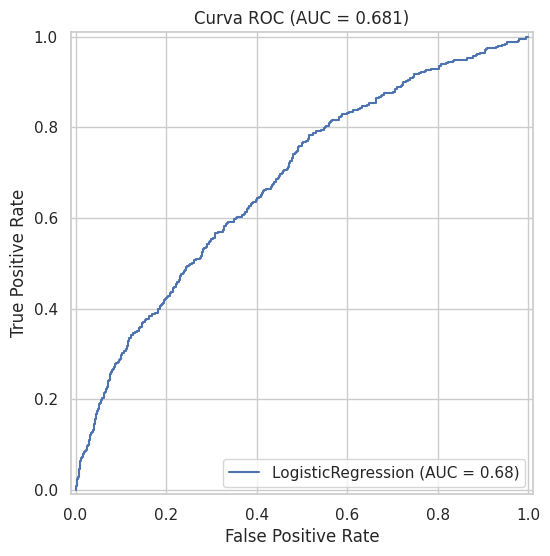

<Figure size 1000x600 with 0 Axes>

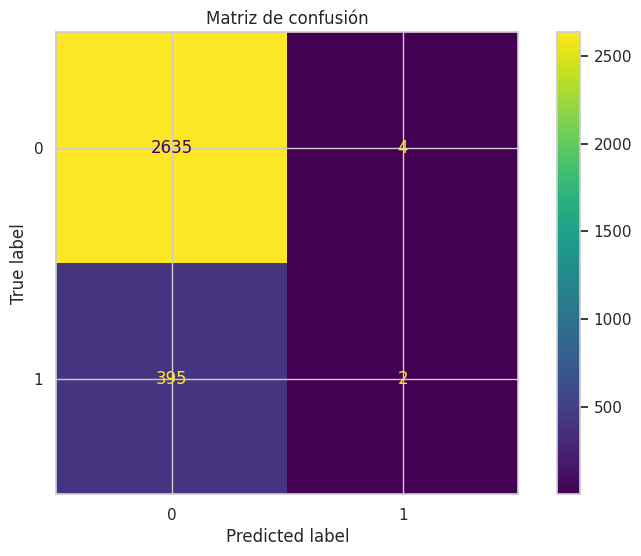

Métricas de Desempeño datos Resampleados:
Accuracy: 0.631
Precision: 0.633
Recall: 0.624
F1 Score: 0.628
AUC-ROC: 0.631
AUC-PR (AP): 0.583

Classification report:
              precision    recall  f1-score   support

           0      0.629     0.638     0.634      2639
           1      0.633     0.624     0.628      2639

    accuracy                          0.631      5278
   macro avg      0.631     0.631     0.631      5278
weighted avg      0.631     0.631     0.631      5278



<Figure size 1000x600 with 0 Axes>

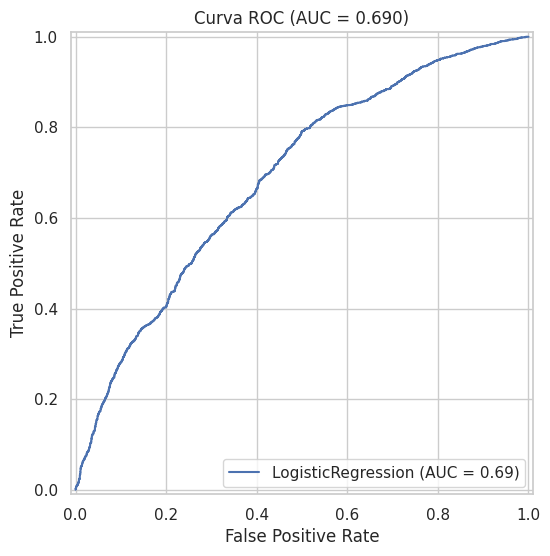

<Figure size 1000x600 with 0 Axes>

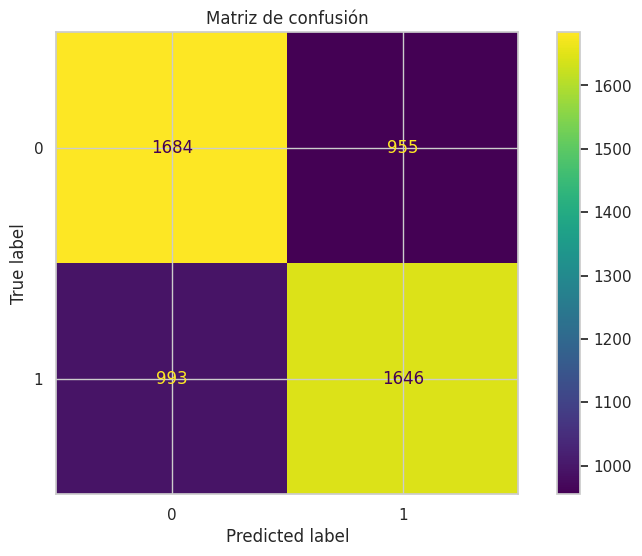

In [77]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Variables independientes
X = df_modelo[["sysBP", "diaBP", "totChol", "prevalentHyp", "sex", "currentSmoker"]].values
# Variable dependiente
y = df_modelo['TenYearCHD'].values

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model_resampled = LogisticRegression(random_state=42)

# Ajustar el modelo a los datos
lr_model.fit(X, y)
lr_model_resampled.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de datos
y_pred = lr_model.predict(X)
y_pred_resampled = lr_model_resampled.predict(X_resampled)

print('==============================================================================')
print("Métricas de Desempeño datos NO resampleados:")
print('==============================================================================')
get_desempeno(y, y_pred, X, lr_model)

print('==============================================================================')
print("Métricas de Desempeño datos Resampleados:")
print('==============================================================================')
get_desempeno(y_resampled, y_pred_resampled, X_resampled, lr_model_resampled)

## Conclusión

- Modelo no balanceado o desbalanceado
  - Aunque el acuraccy es alto 0.869, en realidad no sirve porque casi nunca detecta pacientes con riesgo.
  - aprende a clasificar casi siempre en la clase mayoritaria (0), logrando un buen accuracy pero fallando en la detección de la clase minoritaria (1).
  - Recall = 0.998 en clase 0 indica que el modelo detecta casi a todos los negativos.
  - Recall = 0.005 en clase 1 el modelo casi nunca detecta a los positivos. Solo identifica 0.5%.
  - Precision = 0.333 indica que de los pocos que predice como positivos, solo 1 de cada 3 es correcto

- Modelo balanceado
  - El Accuracy = 0.631 bajó respecto al modelo desbalanceado, pero esto es esperado porque ahora el dataset está balanceado y el modelo no se limita a predecir casi siempre la clase mayoritaria.
  - El modelo identifica razonablemente bien los negativos, aunque no de forma perfecta.
  - F1 Score = 0.628 indica un equilibrio aceptable entre precisión y sensibilidad.
  - Con SMOTE, el modelo mejora considerablemente la detección de casos positivos en comparación al modelo original (recall pasó de 0.5% → 62%).

## 10. Separar Modelos
Separa los modelos de regresión anteriores en dos distintos, respectivamente,
considerando alguna variable categórica. Compara y concluye.

---

## Separar respecto al sexo

In [91]:
df_modelo_hombre = df_limpio.replace({"No": -1, "Yes": 1})[df_limpio['sex'] == 'M'].copy()
df_modelo_mujer = df_limpio.replace({"No": -1, "Yes": 1})[df_limpio['sex'] == 'F'].copy()

/tmp/ipython-input-1283692148.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_modelo_hombre = df_limpio.replace({"No": -1, "Yes": 1})[df_limpio['sex'] == 'M'].copy()
/tmp/ipython-input-1283692148.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_modelo_mujer = df_limpio.replace({"No": -1, "Yes": 1})[df_limpio['sex'] == 'F'].copy()


## Modelo de regresión lineal

In [92]:
print('==============================================================================')
print("Métricas de Desempeño Modelo lineal BMI hombres")
print('==============================================================================')
get_desempeno_modelo_bmi(df_modelo_hombre, ["sysBP", "diaBP", "totChol", "prevalentHyp", "currentSmoker"])

print('\n')
print('==============================================================================')
print("Métricas de Desempeño Modelo lineal BMI Mujeres")
print('==============================================================================')
get_desempeno_modelo_bmi(df_modelo_mujer, ["sysBP", "diaBP", "totChol", "prevalentHyp", "currentSmoker"])

Métricas de Desempeño Modelo lineal BMI hombres
Ecuación:  
Y = 17.318-0.003·X1+0.083·X2+0.009·X3+0.427·X4-0.454·X5
R² = 0.134 | RMSE = 2.894
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     42.50
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           8.22e-41
Time:                        00:38:31   Log-Likelihood:                -3434.4
No. Observations:                1384   AIC:                             6881.
Df Residuals:                    1378   BIC:                             6912.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.02

## Conclusión:

- Ambos modelos tienen un poder explicativo bajo (solo 13–16% de la variabilidad del BMI explicada), pero son estadísticamente significativos.
- Presión diastólica (diaBP) y colesterol (totChol) aumentan el BMI en ambos sexos.
- Fumar reduce el BMI en ambos, con un efecto más pronunciado en mujeres.
- Al revisar los parámetros de cada variable se tiene que hay diferenncia entre hombres y mujeres:
  - En mujeres, la hipertensión prevalente está significativamente asociada a mayor BMI.
  - En hombres, la relación entre BMI y presión diastólica/colesterol es más marcada.
  - El efecto del tabaquismo en reducción de BMI es más fuerte en mujeres.

## Modelo de regresión logística

Métricas de Desempeño Hombre:
Accuracy: 0.605
Precision: 0.615
Recall: 0.562
F1 Score: 0.588
AUC-ROC: 0.605
AUC-PR (AP): 0.565

Classification report:
              precision    recall  f1-score   support

           0      0.597     0.649     0.622      1147
           1      0.615     0.562     0.588      1147

    accuracy                          0.605      2294
   macro avg      0.606     0.605     0.605      2294
weighted avg      0.606     0.605     0.605      2294



<Figure size 1000x600 with 0 Axes>

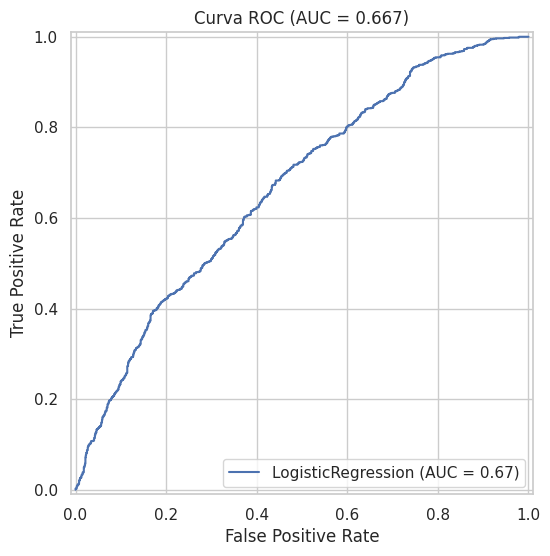

<Figure size 1000x600 with 0 Axes>

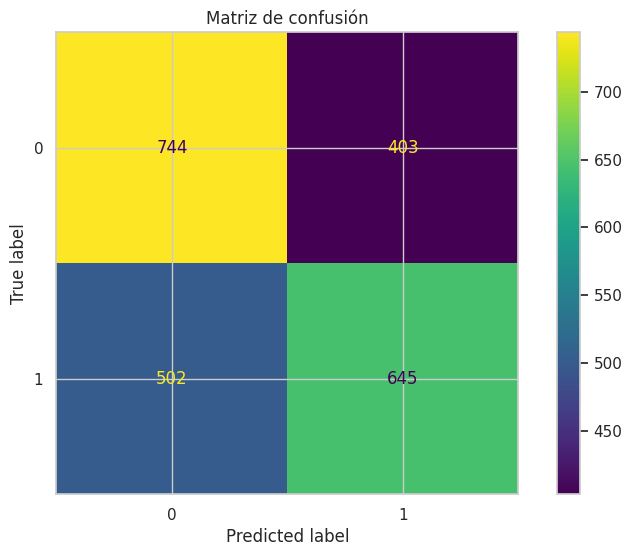

Métricas de Desempeño Mujer:
Accuracy: 0.616
Precision: 0.635
Recall: 0.546
F1 Score: 0.587
AUC-ROC: 0.616
AUC-PR (AP): 0.574

Classification report:
              precision    recall  f1-score   support

           0      0.602     0.686     0.641      1492
           1      0.635     0.546     0.587      1492

    accuracy                          0.616      2984
   macro avg      0.619     0.616     0.614      2984
weighted avg      0.619     0.616     0.614      2984



<Figure size 1000x600 with 0 Axes>

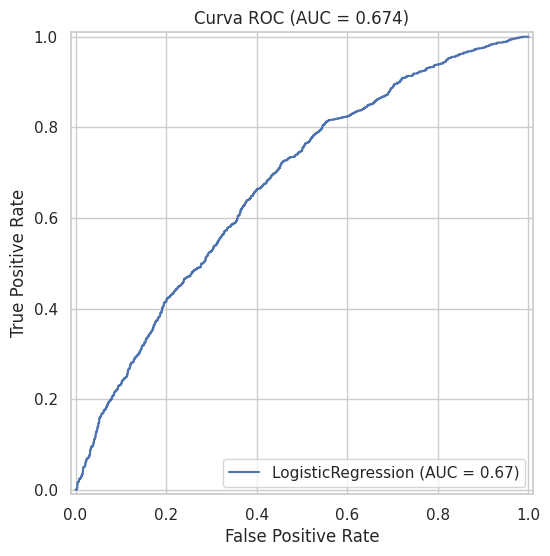

<Figure size 1000x600 with 0 Axes>

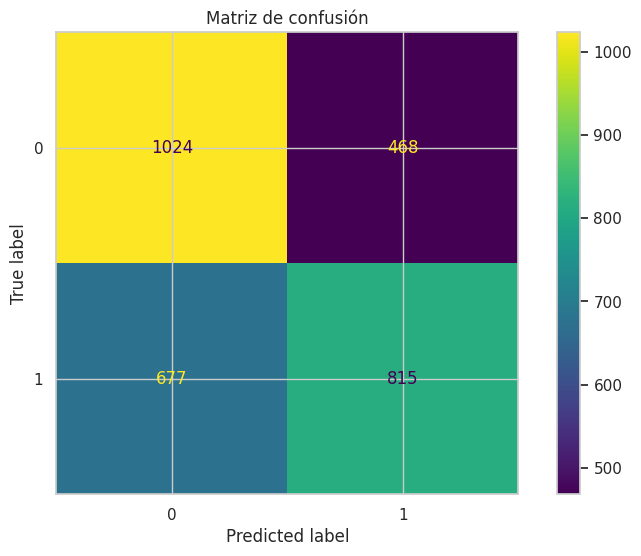

In [94]:
X_hombre = df_modelo_hombre[["sysBP", "diaBP", "totChol", "prevalentHyp", "currentSmoker"]].values
y_hombre = df_modelo_hombre['TenYearCHD'].values

X_mujer = df_modelo_mujer[["sysBP", "diaBP", "totChol", "prevalentHyp", "currentSmoker"]].values
y_mujer = df_modelo_mujer['TenYearCHD'].values

X_hombre = scaler.fit_transform(X_hombre)
X_mujer = scaler.fit_transform(X_mujer)

X_hombre, y_hombre = smote.fit_resample(X_hombre, y_hombre)
X_mujer, y_mujer = smote.fit_resample(X_mujer, y_mujer)

# Crear el modelo de Regresión Logística
lr_model_hombre = LogisticRegression(random_state=42)
lr_model_mujer = LogisticRegression(random_state=42)

# Ajustar el modelo a los datos
lr_model_hombre.fit(X_hombre, y_hombre)
lr_model_mujer.fit(X_mujer, y_mujer)

# Realizar predicciones en el conjunto de datos
y_pred_hombre = lr_model_hombre.predict(X_hombre)
y_pred_mujer = lr_model_mujer.predict(X_mujer)

print('==============================================================================')
print("Métricas de Desempeño Hombre:")
print('==============================================================================')
get_desempeno(y_hombre, y_pred_hombre, X_hombre, lr_model_hombre)

print('==============================================================================')
print("Métricas de Desempeño Mujer:")
print('==============================================================================')
get_desempeno(y_mujer, y_pred_mujer, X_mujer, lr_model_mujer)

## Conclusión

- Los modelos de regresión logística por separado para hombres y mujeres logran un desempeño moderado (cercano a 0.6 en accuracy) y muy parecido entre sí, con apenas ligeras diferencias:
  - En hombres, el modelo es algo más sensible (mayor recall).
  - En mujeres, el modelo es algo más preciso.
  - En general, ninguno de los dos alcanza un nivel de discriminación suficientemente alto para considerarse un predictor clínico robusto.
  - Probablemente es mejor probar un modelo no líneal